## Организационная информация

### Коммуникация

У курса есть **чат в телеграме**, где все важные анонсы, опросы и прочее. Это чат прошлого семестра по вероятностным графическим моделям. Если вас там нет, ОБЯЗАТЕЛЬНО, напишите лектору **@snikolenko**, чтобы он вас туда добавил.

Материалы и домашние работы опять будут на emkn.


### Аттестация
Допуск и недопуск ставятся на основе **успехов с домашними заданиями**: решение прикладной задачи, достижение определённого качества подхода (опять бейзлайны на лидерборде). Их будет немного, и они будут содержательными. Критерии оценки для тех, кто выбрал "облегчённый" путь, ещё прорабатываются.

Также после почти каждого занятия будут **упражнения**; проверяться они не будут, но решать их настоятельно рекомендуется, так как это **закрепление материала и подготовка к предстоящим домашкам**.

Сами занятия -- **мастер-классы в зуме**. Вероятно, во второй половине семестра, когда начнём говорить о содержательных вещах, будет место докладам.


## Настройки

Как поставить jupyter:

`pip install jupyter`

или 

`conda install jupyter`


как запустить сервер jupyter:

`jupyter notebook`

или

`jupyter notebook path_to_downloaded_practice_1.ipynb`

откроется браузер по умолчанию. Если потребуется ТОКЕН, то его можно подсмотреть, вернувшись в консоль.

---

проще использовать colab.research.google.com

Ещё нам понадобится pytorch; в colab он уже есть. Если запускаете локально, вероятно, придётся установить.

In [ ]:
! pip install --upgrade torch 

# PyTorch

Убедимся, что всё поставлено:

In [2]:
import torch

In [3]:
torch.__version__

'1.10.2'

# Железо

In [5]:
torch.cuda.is_available()

False

In [6]:
# ! nvidia-smi

### Если нет GPU

На colab можно включить в разделе "среда выполнения", но сегодня не пригодиттся.

Если хотите запускать локально, есть варианты установки:
https://pytorch.org/get-started/locally/

# Основное

### Тензоры
Tensors - основные объекты, с которыми мы будем работать; идут "на вход" и "получаются на выходе".

Те, кто был на курсе по ВГМ, уже возились с numpy и pandas в прошлом семестре. Здесь очень похоже, но не один-в-один.

    torch.HalfTensor      # 16 бит, с плавающей точкой
    torch.FloatTensor     # 32 бита,  с плавающей точкой
    torch.DoubleTensor    # 64 бита, с плавающей точкой

    torch.ShortTensor     # 16 бит, целочисленный, знаковый
    torch.IntTensor       # 32 бита, целочисленный, знаковый
    torch.LongTensor      # 64 бита, целочисленный, знаковый

    torch.CharTensor      # 8 бит, целочисленный, знаковый
    torch.ByteTensor      # 8 бит, целочисленный, беззнаковый

[полный список](https://pytorch.org/docs/stable/tensors.html)

По умолчанию --  FloatTensor; никакого умного приведения типов при выполнении операций с тензорами не происходит. Ещё наткнётесь непременно. Типы надо приводить явно:


    tralivali.float()



In [8]:
x = torch.tensor([1.0, 2.0])
x 

tensor([1., 2.])

In [9]:
x.dim(), x.size(), x.type()

(1, torch.Size([2]), 'torch.FloatTensor')

In [10]:
torch.zeros((1, 1, 1))

tensor([[[0.]]])

In [12]:
torch.ones((2, 3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [13]:
torch.ones_like(x)

tensor([1., 1.])

In [14]:
x = torch.randn((2, 3))
x

tensor([[-0.6347,  0.2449,  0.3047],
        [-0.7419,  1.8731,  0.1026]])

In [16]:
x.exp()

tensor([[0.5301, 1.2775, 1.3563],
        [0.4762, 6.5086, 1.1081]])

In [18]:
x = torch.randn((2, 3))
y = torch.randn((2, 3))
print(x * y)
print(x + y)

tensor([[-1.2966,  0.0803, -0.0126],
        [ 0.5442,  0.4056, -3.3840]])
tensor([[-0.4862, -1.2815, -0.7183],
        [ 1.6570, -1.4085, -0.9605]])


In [19]:
x = torch.randn((2, 3))
y = torch.randn((3, 2))
x.matmul(y)

tensor([[-1.9436,  1.1714],
        [ 0.7121, -1.9493]])

In [ ]:
# torch.manual_seed(0)

# Берём из нормального распределения
a = torch.randn(5)
a.matmul(torch.ones(5)) # https://pytorch.org/docs/stable/generated/torch.matmul.html
a

## Aggregating

In [1]:
x = torch.randn((2, 3))
agg = x.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

NameError: name 'torch' is not defined

### Размерности и broadcasting

https://pytorch.org/docs/stable/notes/broadcasting.html?highlight=broadcasting

In [28]:
x = torch.randn((3, 4))

In [29]:
x + 1

tensor([[ 9.7396e-01,  1.8636e+00,  1.9088e+00,  1.6720e+00],
        [ 8.0938e-01,  1.8603e+00,  1.0888e-01, -4.7719e-01],
        [ 1.3063e+00,  9.4445e-01,  2.8902e-04, -7.6350e-01]])

In [31]:
x + torch.randn(4)

tensor([[ 0.1316,  2.0209,  2.0600,  0.6209],
        [-0.0330,  2.0176,  0.2601, -1.5283],
        [ 0.4640,  1.1017,  0.1515, -1.8146]])

In [32]:
x + torch.randn((3, 1))

tensor([[-0.5274,  0.3622,  0.4074,  0.1707],
        [-0.0507,  1.0002, -0.7512, -1.3373],
        [ 0.5721,  0.2102, -0.7339, -1.4977]])

In [33]:
x + torch.tensor([1, 2, 3])

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1

In [34]:
# squeeze
# unsqueeze
x + torch.tensor([1, 2, 3]).unsqueeze(1)

tensor([[0.9740, 1.8636, 1.9088, 1.6720],
        [1.8094, 2.8603, 1.1089, 0.5228],
        [3.3063, 2.9444, 2.0003, 1.2365]])

## Вычислительный граф 


Строится с помощью тензоров и "связывающих" их функций

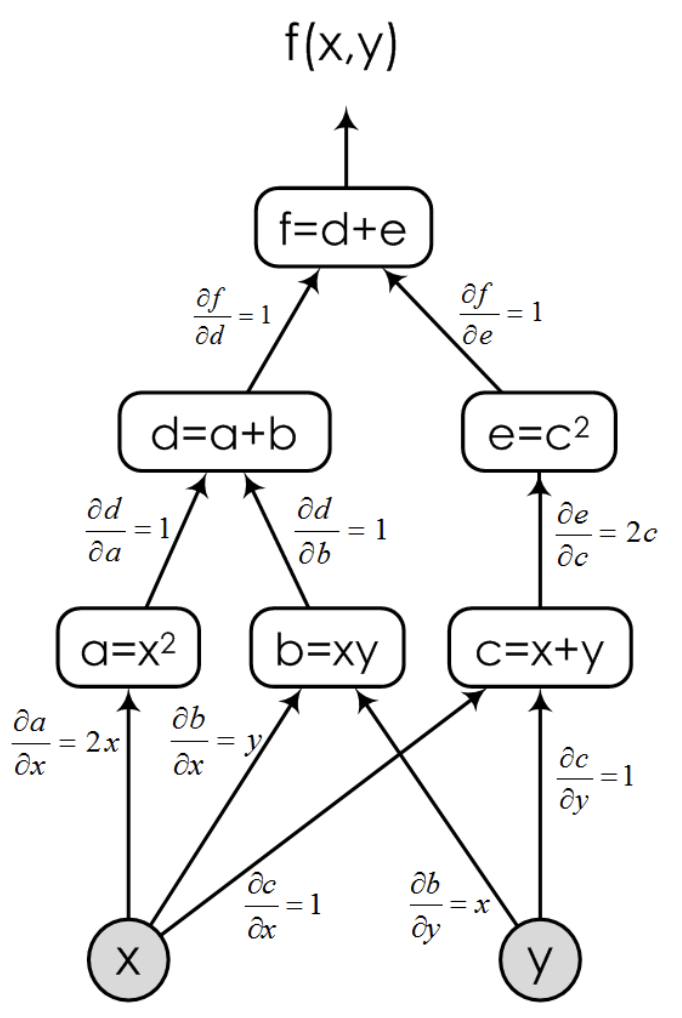

Вычислительные графы в pytorch не нужно задавать в явном виде, но для понимания происходящего следует иметь в виду, как всё устроено под капотом.


Кажется, пришло время для [ДЕМО](https://developers-dot-devsite-v2-prod.appspot.com/machine-learning/crash-course/backprop-scroll).


#### Функции 
Операции, применяемые к тензорам, из которых, можно сказать, и составлен вычислительный граф.

Посмотрим на пример функции, домножающей тензор на вещественную скалярную константу.

In [ ]:
class MulConstant(torch.autograd.Function):

    # forward вычисляет значение функции, используя поданные параметры
    @staticmethod
    def forward(ctx, 
                tensor: torch.FloatTensor, 
                constant: float) -> torch.FloatTensor:
        # ctx -- особый объект-контекст, куда можно складировать
        # вещи, которые понадобятся на этапе backward
        # Если откроете документацию или код, увидите,
        # что надо передать ctx и дальше -- какой угодно список параметров 
        # https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html
        ctx.constant = constant

        # ...так что вместо constant можно было использовать любое
        # другое имя для сохраняемого выше объекта для использования в дальнейшем
        # `ctx.tralivali = constant`, whatever
        # Главное потом использовать правильно :)
        return tensor * constant

    # backward вычисляет производные, которые будут использоваться
    # в алгоритме обратного распространения.
    # На вход передаются градиенты выходов функции.
    @staticmethod
    def backward(ctx, grad_output: torch.FloatTensor) -> torch.FloatTensor:
        # Сколько было аргументов (см. выше -- 2 штуки, ctx не считается),
        # столько и возвращаем градиентов.
        # Если аргументы были не-тензорами, возвращаем None.
        return grad_output * ctx.constant, None

Так, а здесь что происходит? Что делает эта функция?

In [ ]:
class Mul(torch.autograd.Function):
  
    @staticmethod
    def forward(ctx, 
                tensor1: torch.FloatTensor, 
                tensor2: torch.FloatTensor) -> torch.FloatTensor:

        # Оба тензора нам понадобятся для вычисления производной, 
        # поэтому сохраняем их в контекст.
        ctx.tensor1 = tensor1
        ctx.tensor2 = tensor2
        return tensor1 * tensor2 # '*' -- это что такое?

    @staticmethod
    def backward(ctx, grad_output: torch.FloatTensor) -> torch.FloatTensor:
        # Помним, у forward два входа, значит, у backward два выхода
        return grad_output * ctx.tensor2, grad_output * ctx.tensor1

Однако свои функции писать обычно не приходится, так как в pytorch есть масса подходящих встроенных. Берут либо готовые, либо собирают из них новую с помощью суперпозиции.

Встроенные функции можно посмотреть в документации: https://pytorch.org/docs/stable/torch.html.

In [ ]:
MulConstant.apply(x, 3)

tensor([1., 2.])

Обычно делается вот так:

In [ ]:
mul_constant = MulConstant.apply
mul_constant(x, 3)

tensor([3., 6.])

Используя встроенную функцию:

In [ ]:
torch.mul(x, 3)

tensor([3., 6.])

То же, но используя "синтаксис оператора":

In [ ]:
x * 3

tensor([3., 6.])

In [ ]:
Mul.apply(x, x)

tensor([1., 4.])

Можем построить новую функцию, используя питон и встроенную библиотеку для функций.


In [ ]:
def power(tensor: torch.FloatTensor, exponent: int) -> torch.FloatTensor:
  result = torch.ones_like(tensor)
  for i in range(0, exponent):
    result *= tensor # то же, что `result = torch.mul(result, tensor)`
  return result

In [ ]:
power(x, 2)

tensor([1., 4.])

In [ ]:
x = torch.tensor(2.0, requires_grad=True) # requires_grad помечает, что это потенциальный вход для вычислительного графа
y = torch.tensor(2.0, requires_grad=True)
a = x ** 2
b = x * y
c = x + y
d = a + b
e = c ** 2
f = d + e
f

tensor(24., grad_fn=<AddBackward0>)

Прямое вычисление (forward computation) происходит автоматически, одновременно с построением графа. `grad_fn` означает, что `f` не просто отдельный тензор, а связан с вычислительным графом, и `AddBackward` указывает на то, что самая последняя, "верхняя" операция в графе -- это `Add`. И это значит, что можно запускать алгоритм обратного распространения для вычисления градиентов.

### Autograd

Как все уже догадались, главная "фишка" всех современных нейросетевых фреймворков -- автоматическое вычисление производных с помощью механизма обратного распространения (backward propagation ~ backprop).

In [ ]:
f.backward()

In [ ]:
x.grad

tensor(14.)

In [ ]:
y.grad

tensor(10.)

Проделаем то же снова.

In [ ]:
f.backward()

А вот и нетушки. Граф уже уничтожен. pytorch следит за тем, чтобы память не расходовалась почём зря, и уничтожает граф, как только по нему прошёл backprop. Однако сообщение об ошибке предельно ясно нам это и сообщает.

Если хотим граф сохранить, надо передать в backward аргумент `retain_graph=True`.

In [ ]:
x = torch.tensor(2.0, requires_grad=True) # requires_grad shows that this is a graph "input"
y = torch.tensor(2.0, requires_grad=True)
a = x ** 2
b = x * y
c = x + y
d = a + b
e = c ** 2
f = d + e
f

tensor(24., grad_fn=<AddBackward0>)

In [ ]:
f.backward(retain_graph=True)

In [ ]:
x.grad

tensor(14.)

In [ ]:
f.backward(retain_graph=True) 

In [ ]:
x.grad

tensor(28.)

Шта, градиент равен чему-чему (удвоенное предыдущее значение)? torch не сбрасывает значения автоматически (это нам позже пригодится), поэтому важно помнить, что обнулять градиенты придётся вручную.

In [ ]:
x.grad = torch.tensor(0.0)

Когда будет собирать сетки, будем это делать немного иначе

In [ ]:
f.backward() 

In [ ]:
x.grad

tensor(14.)

Пользуясь этим, мы можем вычислить градиенты любой суперпозиции функций.

Обернём в питоновскую функцию по-человечески.

In [ ]:
def f(x: torch.FloatTensor, y: torch.FloatTensor) -> torch.FloatTensor:
    a = x ** 2
    b = x * y
    c = x + y
    d = a + b
    e = c ** 2
    return d + e

In [ ]:
x.grad = torch.tensor(0.0)
f(x, y).backward()
x.grad

tensor(14.)

Так-то лучше.

При каждом вызове функции граф перестраивается, так что сохранять градиенты не нужно!

In [ ]:
x.grad = torch.tensor(0.0)
f(x, y).backward()
# x.grad

Ииогда хочется что бы градиенты не считались

In [4]:
x = torch.tensor(2.0, requires_grad=True) 
y = torch.tensor(2.0, requires_grad=True)
a = x + y
a

tensor(4., grad_fn=<AddBackward0>)

In [9]:
a_copy = a.detach()
a_copy

tensor(4.)

In [10]:
a_copy.requires_grad

False

In [11]:
x = torch.tensor(2.0, requires_grad=True) 
y = torch.tensor(2.0, requires_grad=True)

with torch.no_grad():
    a = x + y
a

tensor(4.)

## Документация

Базовая информация про тензоры
https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

Аutograd
https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

Все базовые операции с тензорами
https://pytorch.org/docs/stable/torch.html

Broadcasting
https://pytorch.org/docs/stable/notes/broadcasting.html


## Ненаучные, но хорошие материалы, рекомендуемые к чтению

* [Статья о Pytorch на хабре с картинками из Twin Peaks](https://habr.com/ru/post/334380/) -- достойный вводный обзор, больше о внутренностях, об истории и месте среди других решений, и ещё немножко нового о синтаксисе и nuts and bolts

* [A. Karpathy 'Yes you should understand backprop'](https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b) -- несмотря на то, как хорошо спроектированы популярные фреймворки для работы с нейросетями, легко стать заложником того *уровня абстракции*, который они предлагают; и не забывать о том, что происходит под капотом у какого-нибудь Pytorch и какими неприятными иногда свойствами обладают те кубики лего, из которых мы собираем сети

* Туда же: [клёвая демка](https://playground.tensorflow.org), которая показывает, как выбранные компоненты и прочие функции влияют на обобщающую способность и вообще на пространство решений многослойного перцептрона

<img width=400 src="https://preview.redd.it/n9fgba8b0qr01.png?width=960&crop=smart&auto=webp&s=6e9ea770a9b0a96d92ad1033ce896e00f2d8b303" />

# Задания для самопроверки

Нужно обязательно делать и задавать вопросы; впереди предстоят задания "а-ля kaggle", к ним нужно уже быть готовыми и подходить во всеоружии.

## 1. Функция Power 

Используя сложение и умножение, реализуйте возведение в целочисленную степень FloatTensor как функцию autograd (т.е. наследника torch.autograd.Function) [3]

In [ ]:
class Power(torch.autograd.Function):
    @staticmethod
    def forward(...):
        return ...


    @staticmethod
    def backward(ctx, grad_output):
        return ..., ...

Проверим, что всё правильно работает:

In [ ]:
assert(torch.all(Power.apply(torch.tensor([1, 2, 3]), 0) == torch.tensor([1,1,1])))
# Сравнение тензоров происходит поэлементно, то есть выражение
# [1,2,3] == [1,1 1] вернёт [True, False, False].
# Поэтому используем torch.all:
# torch.all(x) is true only if all elements of x are True.

In [ ]:
assert(torch.all(Power.apply(torch.tensor([1, 2, 3]), 2) == torch.tensor([1,4,9])))

In [ ]:
# x = torch.tensor([2., 12, .85, 19844.0])
# (x > 6).any()

tensor(True)

In [ ]:
power = Power.apply

Test that gradients are computed correctly (even for composite functions using Power). [1]

In [ ]:
x = torch.tensor([0.0, 1.0], requires_grad=True)
f = power(x, 3)
f


In [ ]:
g = torch.sum(f)
g

In [ ]:
g.backward()

Задав класс `Power`, мы получили в распоряжение новый "строительный материал" для дальнейшего использования в вычислительном графе.

В вычислительном графе для `Power.apply(x, 3)` -- всего три вершины: переменная `x`, константа `3` и наша функция `Power`.

We introduce function `power` in the class. 
How does computational graph for `power(x, 3)` look? 
(hint: we used only two types of building blocks, `*` and `torch.ones_like`) [1]

## 2. Многочлен

Найдите корень (он один) заданного полинома (очень хорошего!) с точностью до пяти знаков после запятой:

In [ ]:
def poly(x: torch.FloatTensor) -> torch.FloatTensor:
    return x**7 + 5 * x**3  + 17 * x - 9

Используя бинарный поиск https://en.wikipedia.org/wiki/Binary_search_algorithm:

In [ ]:
from typing import Callable

In [ ]:
def bin_search_find_zero(poly: Callable[[torch.FloatTensor], torch.FloatTensor]) -> torch.FloatTensor:
  ...
  return ...

Используя метод Ньютона https://en.wikipedia.org/wiki/Newton%27s_method:

Задаётся начальное приближение вблизи предположительного корня, после чего строится касательная к графику исследуемой функции в точке приближения, для которой находится пересечение с осью абсцисс. Эта точка берётся в качестве следующего приближения. И так далее, пока не будет достигнута необходимая точность. 

(hint: для вычисления производных заюзайте backward)

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6929060731e351c465426e37567abe5ee13d65d9"/>


In [ ]:
def newton_find_zero(poly: Callable[[torch.FloatTensor], 
                                    torch.FloatTensor]) -> torch.FloatTensor:

    # начальное значение
    x = torch.tensor(1.0, requires_grad=True)

    # критерий останова, близость значения функции к нулю
    tol = 10 ** -5

    # начальные значения
    val = poly(x)
    val.backward(retain_graph=True)
    dx = ... # дробь

    while abs(val) > tol: # while(dx > tol):
        # обновляем значение x, вычитая дробь
        ...
        # пересчитываем кое-что ещё
        ...

    return x

Сравните скорость методов, т.е. оцените, какой из них найдёт ответ быстрее [1].
Воспользуйтесь командой `%%time`.



In [ ]:
%%time 
2 + 3

In [ ]:
%%time

In [ ]:
%%time

Чтобы получить более точные оценки, стоит воспользоваться командой `%%timeit`.

Она замечательно конфигурируется, [изучите](https://docs.python.org/3/library/timeit.html#command-line-interface), полезное знание.

In [ ]:
%%timeit -n 100 -r 10
2+3